Assignment on FLASK AND WEB-HOSTING

Loading required libraries into colab notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
sales_data = pd.read_csv('/content/Social_Network_Ads.csv')

Conducting Exploratory Data Analysis (EDA)

In [4]:
sales_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# Step 3: Drop User ID
sales_data.drop('User ID', axis=1, inplace=True)

In [6]:
sales_data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
sales_data.tail()

,Gender,Age,EstimatedSalary,Purchased
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [8]:
sales_data.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [10]:
sales_data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [11]:
sales_data.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

Conducting Data Pre-processing

1. Checking for Null values inside dataset

In [12]:
sales_data.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Now checking for outliers:-

In [13]:
new_columns = ['Age','EstimatedSalary']

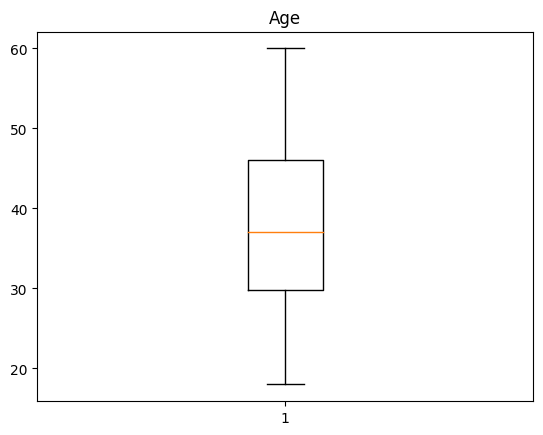

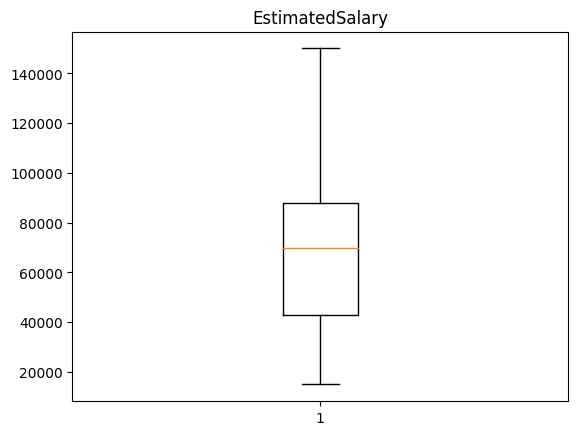

In [14]:
for i in new_columns:
  plt.figure(i)
  plt.boxplot(sales_data[i])
  plt.title(i);

From the boxplot it is evident that there are no outliers.

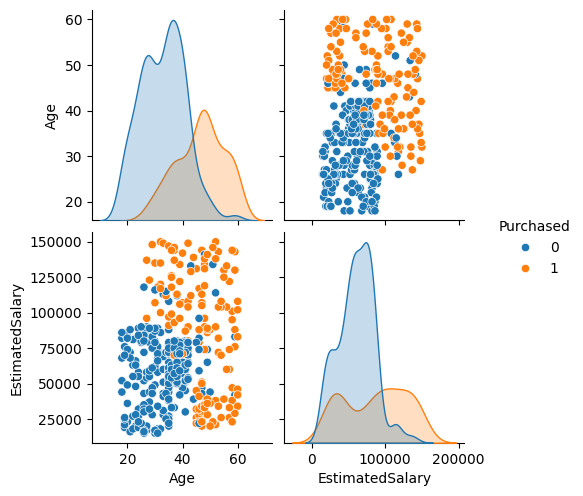

In [15]:
# Step 6: Visualize the distribution of each feature and the relationship with the target variable
sns.pairplot(sales_data, hue='Purchased')
plt.show()

Now we have to encode Gender variable so as the system can understand its significance.

In [16]:
# Step 7: Encode categorical variable (Gender)
label_encoder = LabelEncoder()
sales_data['Gender'] = label_encoder.fit_transform(sales_data['Gender'])

In [17]:
sales_data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [18]:
sales_data.tail()

,Gender,Age,EstimatedSalary,Purchased
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0
399,0,49,36000,1


We can see that the gender feature which showed values either MALE or Female is now showing either 0 or 1 (machine language). Hence the dataset is completely encoded.

Now its time for scaling here we are scaling both AGE AND ESTIMATED SALARY

In [19]:
scaler = StandardScaler()
sales_data[['Age', 'EstimatedSalary']] = scaler.fit_transform(sales_data[['Age', 'EstimatedSalary']])

Now its time for Train-test split. I am using RANDOM FOREST CLASSIFICATION AS MODEL CREATION

Split the dataset into training and testing sets

In [20]:
X = sales_data.drop('Purchased', axis=1)
y = sales_data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building (Random Forest Classifier)

In [21]:
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

In [22]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

PRINTING NEEDFUL SCORES AND ACCURACY.

In [23]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8875
Precision: 0.8275862068965517
Recall: 0.8571428571428571
F1 Score: 0.8421052631578947


In [24]:
# Assume you have new data for prediction
new_data = pd.DataFrame({'Gender': ['Male'], 'Age': [55], 'EstimatedSalary': [150000]})

In [25]:
# Encode categorical variable (Gender)
new_data['Gender'] = label_encoder.transform(new_data['Gender'])

In [26]:
# Scale numerical features if necessary
new_data[['Age', 'EstimatedSalary']] = scaler.transform(new_data[['Age', 'EstimatedSalary']])

In [27]:
# Make prediction
prediction = rf_classifier.predict(new_data)

In [28]:
# Convert prediction to human-readable form
prediction_result = 'Will purchase' if prediction[0] == 1 else 'Will not purchase'
print("Prediction:", prediction_result)

Prediction: Will purchase


THUS MODEL CREATION AND PREDICTION IS THUS COMPLETED
BACK-END PROCESS IS FINISHED. NOW BEFORE MOVING INTO FRONT END I.E. .css, Flask AND html, WE NEED TO SAVE THIS MODEL FOR FURTURE USE. THAT PROCESS IS CALLED PICKLEING

PICKLEING

SyntaxError: incomplete input (<ipython-input-30-54547dea0f7b>, line 3)